### Please make sure you have access rights for all resources and follow all the contribution guidelines. 

## To Know about the architecture of the complete project

https://dev.azure.com/cgmwhh/ChildGrowthMonitor/_git/infrastructure?path=%2Foperations_manual.md&version=GBmaster&fullScreen=true

## Step 1: Git Implementation
Refer the readme to setup Git workflow [https://github.com/Welthungerhilfe/cgm-ml]

## Step 2: JupyterHub Access
- Get acces to jupyterhub https://hub.childgrowthmonitor.org
- On the Terminal Clone the cgm-ml repo
    git clone https://github.com/Welthungerhilfe/cgm-ml.git
- cd cgm-ml

## Step 3: Setting up the database
- On terminal
- cp /whhdata/dbconnection.json notebooks/cgm-ml/cgm_database
- cd /notebooks/cgm-ml/cgm_database  
- Refer to [dbutils.py](cgm-ml/cgm_database/dbutils.py) for helpful database operations.

## Some key points to lookout for
- After changing your intital password on jupyterhub, the connection may close.
- Azure portal and Azure devops share the same azure user object, so login data are always identical. Linux user objects are     independent of Azure user objects. changing your password in one system does NOT change the password in the other system.
- Also, the two Jupyterhub linux VMs have independent user management, so role assignment, access rights, passwords might even    differ depending on whether you use the data scientist VM with GPU or the one without.
- Jupyterhub user directories are temporary only and might be deleted at any time

In [4]:
import dbutils
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob2
from random import randint
from IPython.core.display import Image, display
import numpy as np
from skimage import transform,io
import cv2
import IPython

# Where to store outputs.
output_path = "/outputs"
output_path = "."

# Connect to database.
main_connector = dbutils.connect_to_main_database()


In [5]:
main_connector.get_columns("measurements")

['id',
 'measurement_id',
 'person_id',
 'qrcode',
 'sex',
 'type',
 'age_days',
 'height_cms',
 'weight_kgs',
 'muac_cms',
 'head_circumference_cms',
 'oedema',
 'latitude',
 'longitude',
 'address',
 'timestamp',
 'deleted',
 'deleted_by',
 'visible',
 'created_by']

In [6]:
main_connector.get_columns('image_data')

['id',
 'path',
 'qrcode',
 'last_updated',
 'rejected_by_expert',
 'had_error',
 'error_message',
 'width_px',
 'height_px',
 'blur_variance',
 'has_face',
 'measurement_id']

In [7]:
def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

In [8]:
training_path = "/whhdata/person/MH_WHH_0035/measurements/1537342371195/rgb/"
glob_search_path = os.path.join(training_path, "**/*.jpg")
jpg_paths = glob2.glob(glob_search_path)
print("jpg_paths", len(jpg_paths))

jpg_paths 94


### Some random sample

In [9]:
index = randint(0,len(jpg_paths)-1)
img_filename = jpg_paths[index]
image = io.imread(img_filename)
print("File %s: %s" % (index, img_filename))
imshow(image)

AttributeError: module 'PIL.Image' has no attribute 'register_extensions'

In [10]:
main_connector.get_columns('point_cloud')

[]

## Function to display point cloud data


In [10]:
from cgmcore.utils import load_pcd_as_ndarray
from cgmcore.utils import render_pointcloud
def plot_pcd(pcd_path):
    pointcloud = load_pcd_as_ndarray(pcd_path)
    print("Loading... pointcloud with shape {}.".format(pointcloud.shape))
    render_pointcloud(pointcloud, "A pointcloud")

WARNING! VTK not available. This might limit the functionality.


Loading... pointcloud with shape (37451, 4).


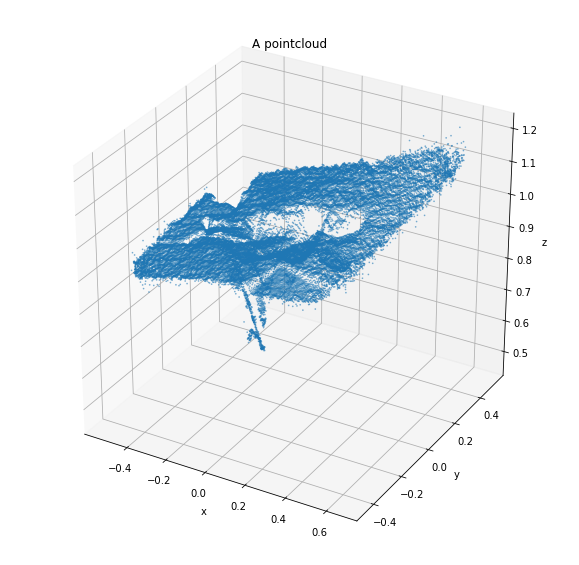

In [11]:
pcd_path = "/whhdata/person/MH_WHH_0035/measurements/1537342371195/pc/pc_MH_WHH_0035_1537342371195_104_000.pcd"
plot_pcd(pcd_path)